In [1]:
import matplotlib.pyplot as plt
import networkx as nx
import json
from rdkit import Chem

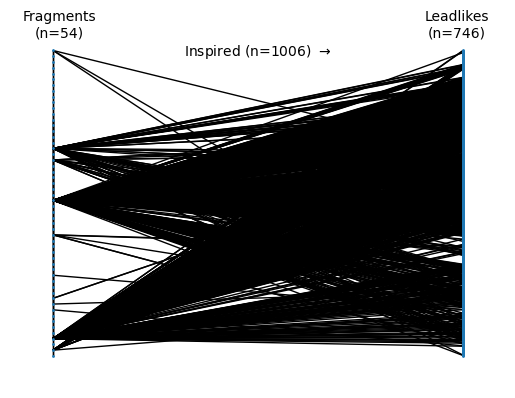

In [61]:
def plot_bipartite(fragments, leadlikes, inspiration_links, filename):
    B = nx.Graph()
    # Add nodes with the node attribute "bipartite"
    B.add_nodes_from(list(fragments.keys()), bipartite=0)
    B.add_nodes_from(list(leadlikes.keys()), bipartite=1)
    # # Add edges only between nodes of opposite node sets
    edges_to_add = []
    rmsd_weights = []
    for leadlike_name, data in inspiration_links.items():
        matched_fragments = data["MATCHED_FRAGMENTS"]
        if not matched_fragments:
            continue

        for matched_fragment in matched_fragments:
            if leadlike_name == matched_fragment["FRAGMENT_NAME"]:
                continue # prevent self-connections
            edges_to_add.append((leadlike_name, matched_fragment["FRAGMENT_NAME"]))
            rmsd_weights.append(matched_fragment["FRAGMENT_LEAD_OVERLAP_RMSD"])

    B.add_edges_from(edges_to_add)

    # separate the leadlikes to the left column
    B_first_partition_nodes = list(fragments.keys())
    nx.draw_networkx(
        B,
        pos = nx.drawing.layout.bipartite_layout(B, B_first_partition_nodes), 
        # width = rmsd_weights,
        with_labels=False,
        node_size=1
        )

    # some formatting
    plt.axis("off")
    plt.annotate(f"Fragments\n(n={len(fragments)})", xy=(0.1, 0.95), xycoords="axes fraction", ha="center")
    plt.annotate(f"Leadlikes\n(n={len(leadlikes)})", xy=(0.9, 0.95), xycoords="axes fraction", ha="center")
    plt.annotate(rf"Inspired (n={len(edges_to_add)}) $\rightarrow$", xy=(0.5, 0.9), xycoords="axes fraction", ha="center")
    plt.savefig(filename, dpi=300)

    plt.show()

target = ["SARS-CoV-2", "Mpro"]
fragments = { mol.GetProp("_Name").replace("_bound",""):mol for mol in Chem.SDMolSupplier(f"../data/{target[0]}/{target[1]}/fragments/structures/fragments.sdf", sanitize=False) }
leadlikes = { mol.GetProp("_Name"):mol for mol in Chem.SDMolSupplier(f"../data/{target[0]}/{target[1]}/leadlikes/leadlikes.sdf", sanitize=False) }
with open(f"../data/{target[0]}/{target[1]}/inspiration_links/matched_fragments_to_leadlikes.json") as f:
    inspiration_links = json.load(f)

plot_bipartite(fragments, leadlikes, inspiration_links, filename=f"bipartite_{target[0]}_{target[1]}.png")


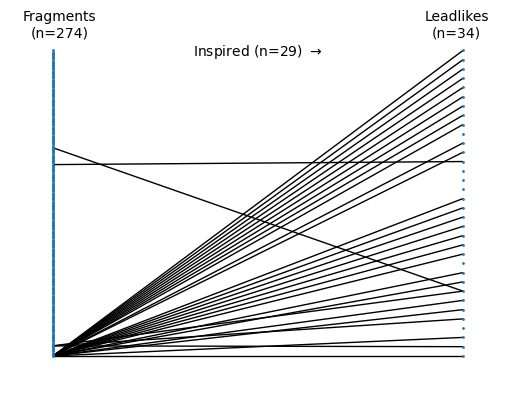

In [62]:
fragments = { mol.GetProp("_Name").replace("_bound",""):mol for mol in Chem.SDMolSupplier("../data/SARS-CoV-2/Mac1/fragments/structures/fragments.sdf", sanitize=False) }
leadlikes = { mol.GetProp("_Name"):mol for mol in Chem.SDMolSupplier("../data/SARS-CoV-2/Mac1/leadlikes/leadlikes.sdf", sanitize=False) }
with open("../data/SARS-CoV-2/Mac1/inspiration_links/matched_fragments_to_leadlikes.json") as f:
    inspiration_links = json.load(f)
plot_bipartite(fragments, leadlikes, inspiration_links, filename="bipartite_SARS_CoV_2_Mac1.png")

In [63]:
# unfortunately ZIKV-NS2B3 and EVA71-2Apro don't have any connections.